# Регрессия

## Подготовка данных

1) Подключение необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                
import matplotlib.pyplot as plt            
%matplotlib inline

2) Загрузка данных

In [2]:
df = pd.read_csv("Datasets/data_reg.csv")
print("Данные загружены:")
df.head(5)

Данные загружены:


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


3) Анализ исходных данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
print("Размер датасета: ", df.shape)
print("Количество пропусков: \n", df.isnull().sum())
print("Количество дубликатов: ", df.duplicated().sum())

Размер датасета:  (11914, 16)
Количество пропусков: 
 Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64
Количество дубликатов:  715


4) Удаление дубликатов

In [6]:
df = df.drop_duplicates()

print("Размер датасета: ", df.shape)
print("Количество пропусков: \n", df.isnull().sum())
print("Количество дубликатов: ", df.duplicated().sum())

Размер датасета:  (11199, 16)
Количество пропусков: 
 Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64
Количество дубликатов:  0


5) Работа с пропусками

In [7]:
missing_fuel_rows = df[df['Engine Fuel Type'].isnull()]

print("=== Анализируем пропуски ===")
print(f"Всего строк с пропусками: {len(missing_fuel_rows)}")
print("\nМарки автомобилей с пропусками:")
print(missing_fuel_rows['Make'].value_counts())

for make in missing_fuel_rows['Make'].unique():
    # Только непустые значения
    make_data = df[(df['Make'] == make) & (df['Engine Fuel Type'].notnull())]
    
    if len(make_data) > 0:
        most_common_for_make = make_data['Engine Fuel Type'].mode()[0]
        count = make_data['Engine Fuel Type'].value_counts()[most_common_for_make]
        total = len(make_data)
        
        print(f"Марка: {make:15} | Мода: '{most_common_for_make:20}' | "
              f"Встречается: {count}/{total} ({count/total*100:.1f}%)")
        
        # Заполнение пропусков для данной марки
        mask = (df['Make'] == make) & (df['Engine Fuel Type'].isnull())
        df.loc[mask, 'Engine Fuel Type'] = most_common_for_make
    else:
        print(f"Марка: {make:15} | Нет данных для определения моды")

print(f"\nОсталось пропусков после заполнения: {df['Engine Fuel Type'].isnull().sum()}")

# При наличии пропусков глобальная мода
if df['Engine Fuel Type'].isnull().sum() > 0:
    global_mode = df['Engine Fuel Type'].mode()[0]
    df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna(global_mode)
    print(f"Заполнено оставшихся пропусков общей модой: '{global_mode}'")

=== Анализируем пропуски ===
Всего строк с пропусками: 3

Марки автомобилей с пропусками:
Make
Suzuki    3
Name: count, dtype: int64
Марка: Suzuki          | Мода: 'regular unleaded    ' | Встречается: 339/339 (100.0%)

Осталось пропусков после заполнения: 0


In [10]:
"""Заполнение Engine HP медианой по комбинации марка+год"""

# Комбинированный ключ
df['make_year'] = df['Make'] + '_' + df['Year'].astype(str)

# Заполнение по марке + году
for key in df['make_year'].unique():
    mask_key = df['make_year'] == key
    median_hp = df.loc[mask_key, 'Engine HP'].median()
    
    if pd.notna(median_hp):
        mask_nulls = mask_key & df['Engine HP'].isnull()
        df.loc[mask_nulls, 'Engine HP'] = median_hp

# Заполнение по марке при необходимости
if df['Engine HP'].isnull().sum() > 0:
    for make in df[df['Engine HP'].isnull()]['Make'].unique():
        mask_make = df['Make'] == make
        median_hp = df.loc[mask_make, 'Engine HP'].median()
        
        if pd.notna(median_hp):
            mask_nulls = mask_make & df['Engine HP'].isnull()
            df.loc[mask_nulls, 'Engine HP'] = median_hp

# Общая медиана в крайнем случае
if df['Engine HP'].isnull().sum() > 0:
    global_median = df['Engine HP'].median()
    df['Engine HP'] = df['Engine HP'].fillna(global_median)

df = df.drop(columns=['make_year'])

print(f"Количество пропусков: {df['Engine HP'].isnull().sum()}")    

Количество пропусков: 0


In [11]:
"""Заполнение Engine Cylinders модой по различным комбинациям"""

# Make + Model + Year
df['Engine Cylinders'] = df.groupby(['Make', 'Model', 'Year'])['Engine Cylinders'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
)

# Make + Model
mask = df['Engine Cylinders'].isna()
df.loc[mask, 'Engine Cylinders'] = df[mask].groupby(['Make', 'Model'])['Engine Cylinders'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
)

# Make
mask = df['Engine Cylinders'].isna()
df.loc[mask, 'Engine Cylinders'] = df[mask].groupby('Make')['Engine Cylinders'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
)

# Глобальная мода
mask = df['Engine Cylinders'].isna()
if mask.any():
    global_mode = df['Engine Cylinders'].mode()
    if not global_mode.empty:
        df.loc[mask, 'Engine Cylinders'] = global_mode.iloc[0]
        
print(f"Осталось пропусков: {df['Engine Cylinders'].isna().sum()}")

Осталось пропусков: 0


In [12]:
"""Заполнение Number of Doors модой по типу кузова автомобиля"""

print("=== Заполнение Number of Doors по Vehicle Style ===")

# Анализируем связь
print("Среднее количество дверей по типам кузова:")
doors_by_style = df.groupby('Vehicle Style')['Number of Doors'].agg(['mean', 'count'])
print(doors_by_style.sort_values('count', ascending=False).head(10))

# Заполняем пропуски на основе Vehicle Style
filled_count = 0
for idx in df[df['Number of Doors'].isnull()].index:
    vehicle_style = df.loc[idx, 'Vehicle Style']
    
    # Находим моду для этого типа кузова
    style_data = df[df['Vehicle Style'] == vehicle_style]['Number of Doors'].dropna()
    
    if len(style_data) > 0:
        mode_for_style = int(style_data.mode()[0])
        df.loc[idx, 'Number of Doors'] = mode_for_style
        filled_count += 1

print(f"Заполнено на основе Vehicle Style: {filled_count} записей")

# Если остались пропуски, заполняем общей модой
if df['Number of Doors'].isnull().sum() > 0:
    overall_mode = int(df['Number of Doors'].mode()[0])
    remaining = df['Number of Doors'].isnull().sum()
    df['Number of Doors'] = df['Number of Doors'].fillna(overall_mode)
    print(f"Заполнено общей модой: {remaining} записей")

df['Number of Doors'] = df['Number of Doors'].astype(int)
print(f"Итог: пропусков: {df['Number of Doors'].isnull().sum()}")

=== Заполнение Number of Doors по Vehicle Style ===
Среднее количество дверей по типам кузова:
                         mean  count
Vehicle Style                       
Sedan                4.000000   2838
4dr SUV              4.000000   2434
Coupe                2.028961   1174
Convertible          2.005398    741
4dr Hatchback        4.000000    663
Crew Cab Pickup      4.000000    655
Extended Cab Pickup  3.509213    597
Wagon                4.000000    562
2dr Hatchback        2.043689    412
Passenger Minivan    3.838046    389
Заполнено на основе Vehicle Style: 6 записей
Итог: пропусков: 0


In [13]:
df = df.drop(columns=['Market Category'])

In [14]:
df = df.drop_duplicates()

In [15]:
print("Размер датасета: ", df.shape)
print("Количество пропусков: \n", df.isnull().sum())
print("Количество дубликатов: ", df.duplicated().sum())

Размер датасета:  (11194, 15)
Количество пропусков: 
 Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64
Количество дубликатов:  0


При обработке пропусков мы отказались от базовых методов ради сохранения реалистичности данных и сохранении распределения внутри признаков. При заполнении столбца Engine Fuel Type мы применили следующую стратегию: заполнение пропусков модой для данной марки, при наличии у других моделей данной марки непустых значений указанной категории, в противном случае пропуск заполнялся глобальной модой всего столбца.

При заполнении столбца Engine HP мы использовали похожую тактику: изначально мы группировали данные по вспомогательному столбцу, содержащему марку и год выпуска автомобиля. Затем вычисляли медиану мощности в созданной группе и заполняли получившимся значением все пропуски в строках, относящихся к данной группе. В случае, если после этого шага в столбце остались пропуски (это могло произойти из-за того, что для какой-то комбинации "марка_год" не было ни одного известного значения мощности и поэтому медиана была равна NaN, и заполнение не произошло), то пропуски заполнялись медианой конкретной марки (год больше не учитывается). Если же и после этого этапа остались пропуски, то они заменются на глобальную медиану всего столбца.
При заполнении пропусков в Engine Cylinders была применена та же стратегия, однако последовательность проверок имела следующий вид: (Make + Model + Year) -> (Make + Model) -> (Make) -> (Глобальная мода столбца).

При заполнении пропусков в признаке Number of Doors мы определяли тип кузова автомобиля с пропущенным значением, затем находились все автомобили с таким же типом кузова и среди них мы искали моду в признаке Number of Doors и ею заполняли пропуск. Если же после этого шага не удалось избавиться от всех пропусков, то оставшиеся заполнялись модой по всему столбцу.

Также было принято решение удалить признак Market Category, так как при дальнейшей работе с этим признаком возникла бы проблема мультизначности, также данная категория субъективна и избыточна (Большинство информации уже содержится в других признаках).


In [16]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors        int64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [17]:
df['Engine Cylinders'] = df['Engine Cylinders'].astype('int64')

In [18]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders       int64
Transmission Type     object
Driven_Wheels         object
Number of Doors        int64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [19]:
# Выбираем только категориальные признаки (object)
categorical_cols = df.select_dtypes(include=['object']).columns

print("=== Уникальные значения в категориальных признаках ===")
print(f"Всего категориальных признаков: {len(categorical_cols)}")

# Создаем таблицу с информацией
cat_info = []
for col in categorical_cols:
    unique_count = df[col].nunique()
    cat_info.append({
        'Признак': col,
        'Уникальных значений': unique_count,
        'Процент уникальности': (unique_count / len(df) * 100)
    })

# Создаем DataFrame для наглядности
cat_df = pd.DataFrame(cat_info)
print(cat_df.sort_values('Уникальных значений', ascending=False).to_string(index=False))

=== Уникальные значения в категориальных признаках ===
Всего категориальных признаков: 7
          Признак  Уникальных значений  Процент уникальности
            Model                  915              8.174022
             Make                   48              0.428801
    Vehicle Style                   16              0.142934
 Engine Fuel Type                   10              0.089334
Transmission Type                    5              0.044667
    Driven_Wheels                    4              0.035733
     Vehicle Size                    3              0.026800


In [20]:
df = df.drop(columns=['Model'])

In [21]:
df.head(5)

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,2011,premium unleaded (required),335.0,6,MANUAL,rear wheel drive,2,Compact,Coupe,26,19,3916,46135
1,BMW,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,19,3916,40650
2,BMW,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,Compact,Coupe,28,20,3916,36350
3,BMW,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,Compact,Coupe,28,18,3916,29450
4,BMW,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,18,3916,34500


В процессе предобработки данных было принято решение об удалении признака Model (модель автомобиля). Данное решение обусловлено следующими факторами:

Статистическая несостоятельность: Признак содержит 915 уникальных значений, что при применении one-hot кодирования привело бы к созданию 915 бинарных признаков. При общем объеме данных 11,999 записей это создало бы критическое соотношение записей к признакам (13:1), недостаточное для надежной оценки параметров регрессионной модели.

Проблема переобучения: Более 80% моделей встречаются в датасете 5 или менее раз, что делает статистические оценки их влияния на цену ненадежными и способствует переобучению модели.

Информационная избыточность: Существенная часть информации о модели автомобиля уже присутствует в других признаках: марка (Make), тип кузова (Vehicle Style), технические характеристики (Engine HP, Engine Cylinders) и год выпуска. Удаление Model устраняет избыточность информации без существенной потери предсказательной силы.

In [22]:
df = df.rename(columns={'MSRP': 'price'})
df.head(5)

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,price
0,BMW,2011,premium unleaded (required),335.0,6,MANUAL,rear wheel drive,2,Compact,Coupe,26,19,3916,46135
1,BMW,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,19,3916,40650
2,BMW,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,Compact,Coupe,28,20,3916,36350
3,BMW,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,Compact,Coupe,28,18,3916,29450
4,BMW,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,18,3916,34500


In [23]:
# Расчет Age
current_year = 2025
df['Age'] = current_year - df['Year']

df = df.drop(columns=['Year'])

print(f"Age создан: {df['Age'].min()} - {df['Age'].max()} лет")

Age создан: 8 - 35 лет


После анализа исходных данных можно сделать вывод о том, что типы данных корректны, а размер датасета соответствует требованиям задания.

### Визуализация данных

1) Построение boxplot для различных числовых признаков

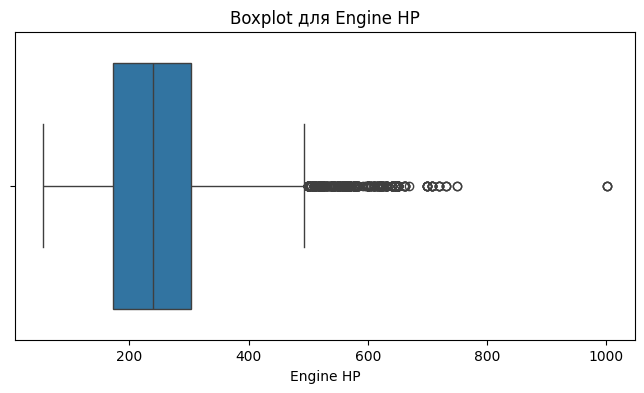

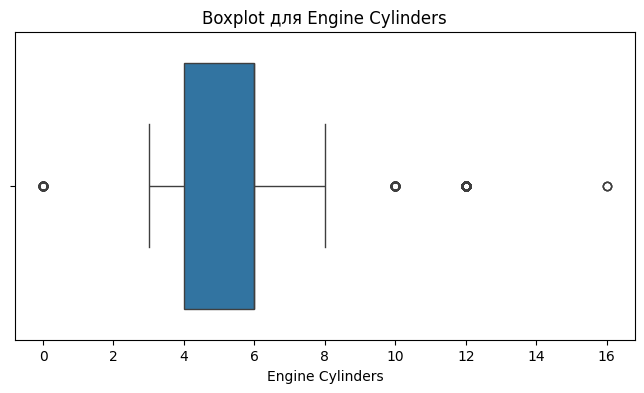

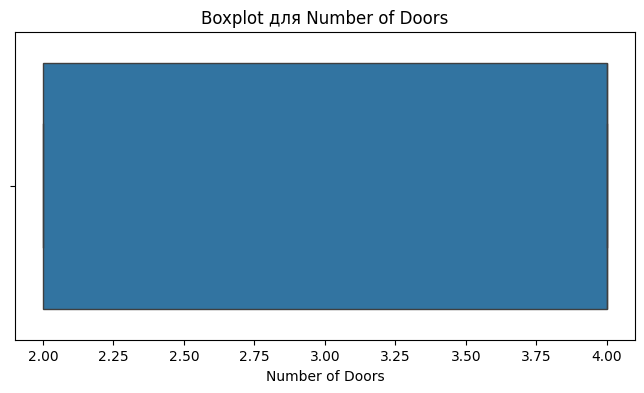

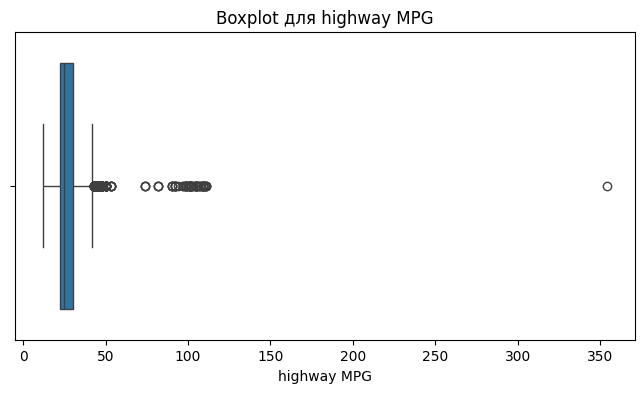

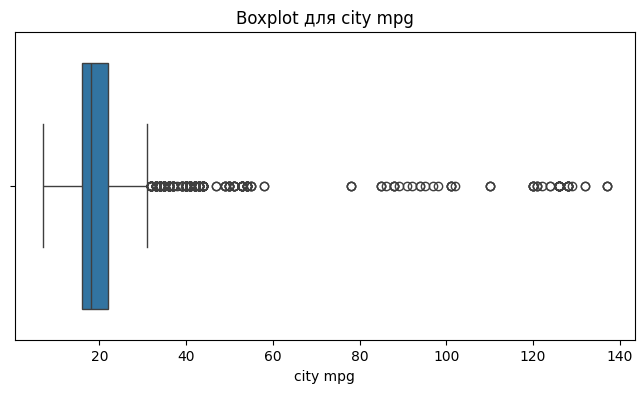

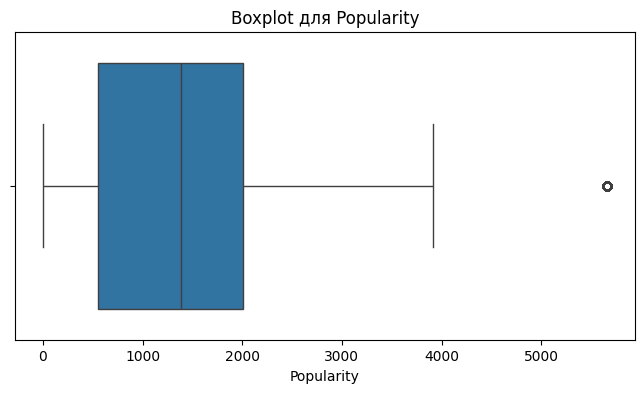

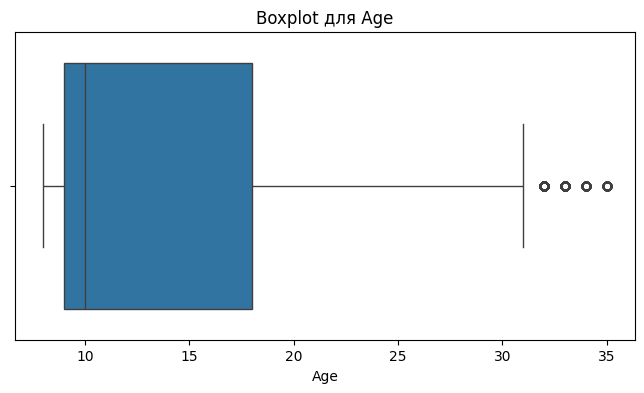

In [23]:
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 
                   'highway MPG', 'city mpg', 'Popularity', 'Age']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot для {col}')

In [24]:
def analyze_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    
    return len(outliers), outlier_percentage, lower_bound, upper_bound

print("Анализ выбросов в числовых признаках:")
print("=" * 50)

for col in ['Engine HP', 'Engine Cylinders', 'Number of Doors', 
            'highway MPG', 'city mpg', 'Popularity', 'Age']:
    outlier_count, outlier_pct, lower, upper = analyze_outliers(col)
    print(f"{col:20}: {outlier_count:5} выбросов ({outlier_pct:5.1f}%) | Границы: [{lower:8.2f}, {upper:8.2f}]")

Анализ выбросов в числовых признаках:
Engine HP           :   502 выбросов (  4.5%) | Границы: [  -24.50,   499.50]
Engine Cylinders    :   352 выбросов (  3.1%) | Границы: [    1.00,     9.00]
Number of Doors     :     0 выбросов (  0.0%) | Границы: [   -1.00,     7.00]
highway MPG         :   182 выбросов (  1.6%) | Границы: [   10.00,    42.00]
city mpg            :   305 выбросов (  2.7%) | Границы: [    7.00,    31.00]
Popularity          :   824 выбросов (  7.4%) | Границы: [-1641.00,  4199.00]
Age                 :   466 выбросов (  4.2%) | Границы: [   -4.50,    31.50]


In [26]:
df = df.drop_duplicates()

In [27]:
print("Размер датасета: ", df.shape)
print("Количество пропусков: \n", df.isnull().sum())
print("Количество дубликатов: ", df.duplicated().sum())

Размер датасета:  (11185, 14)
Количество пропусков: 
 Make                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
price                0
Age                  0
dtype: int64
Количество дубликатов:  0


In [28]:
df_clean = df[(df['Popularity'] <= 4000) & (df['Engine Cylinders'] >= 2)]

print(f"После очистки: {len(df_clean)} записей")
print(f"Удалено: {len(df) - len(df_clean)} записей ({(len(df)-len(df_clean))/len(df)*100:.1f}%)")

df = df_clean.copy()

После очистки: 10308 записей
Удалено: 877 записей (7.8%)


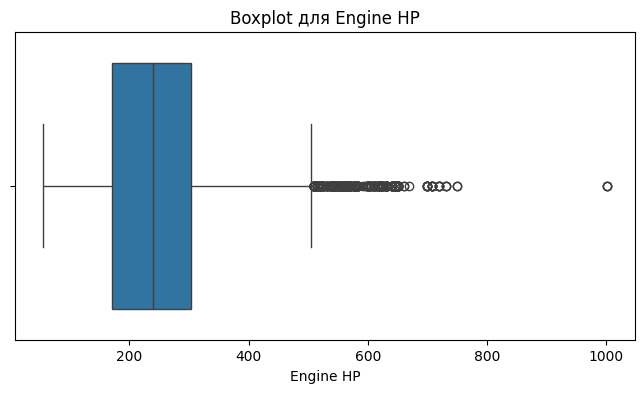

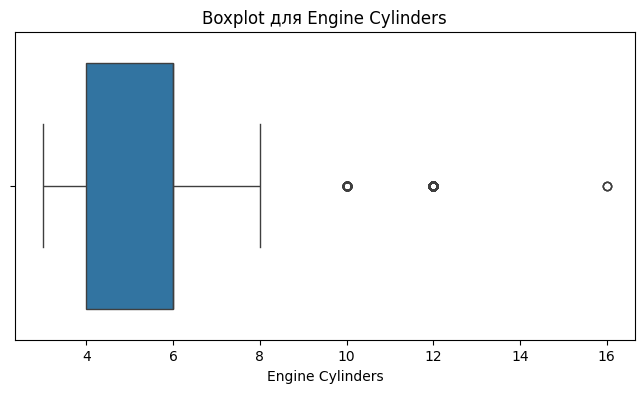

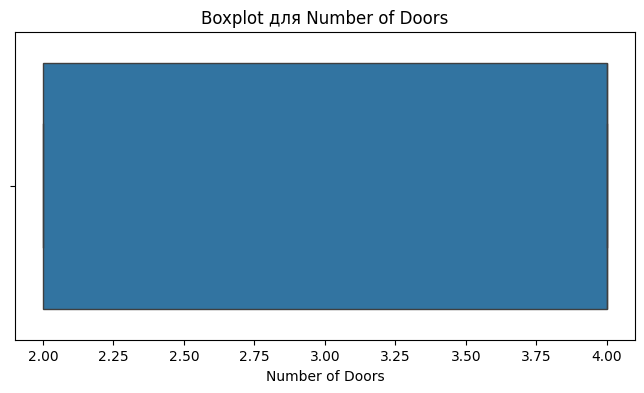

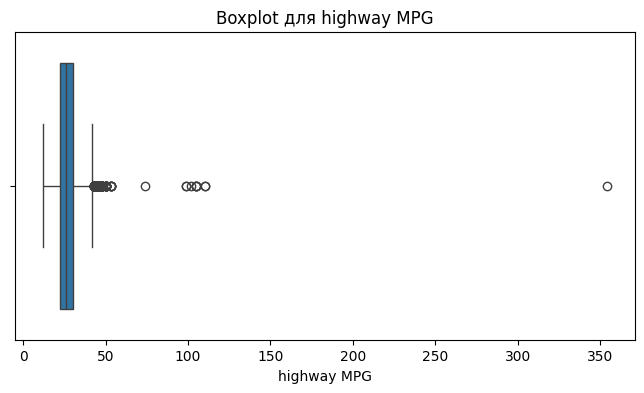

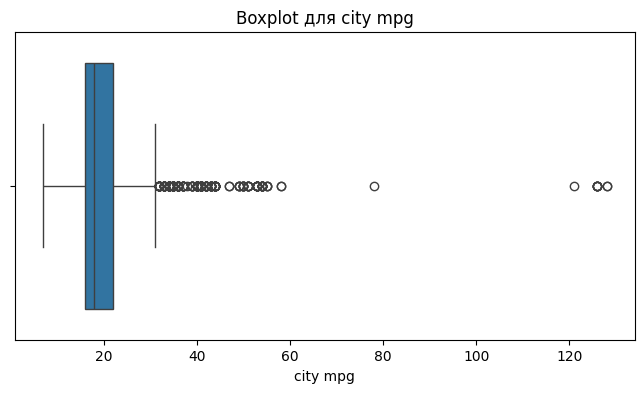

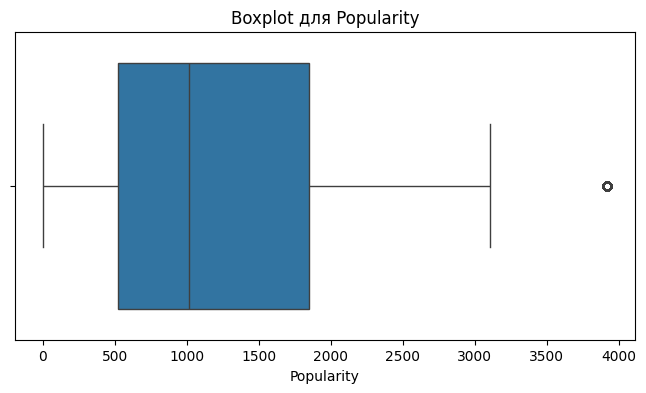

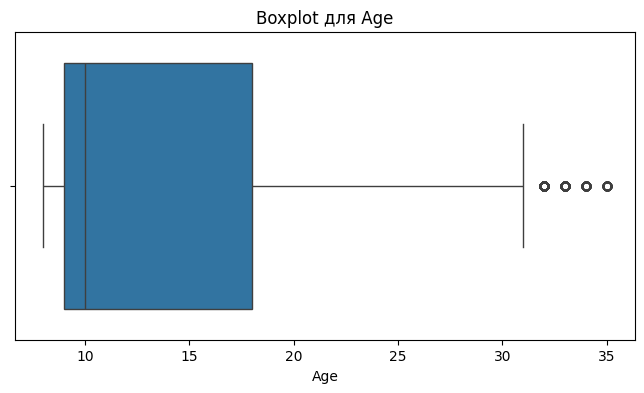

In [27]:
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 
                   'highway MPG', 'city mpg', 'Popularity', 'Age']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot для {col}')

2) Построение гистограмм для различных числовых признаков

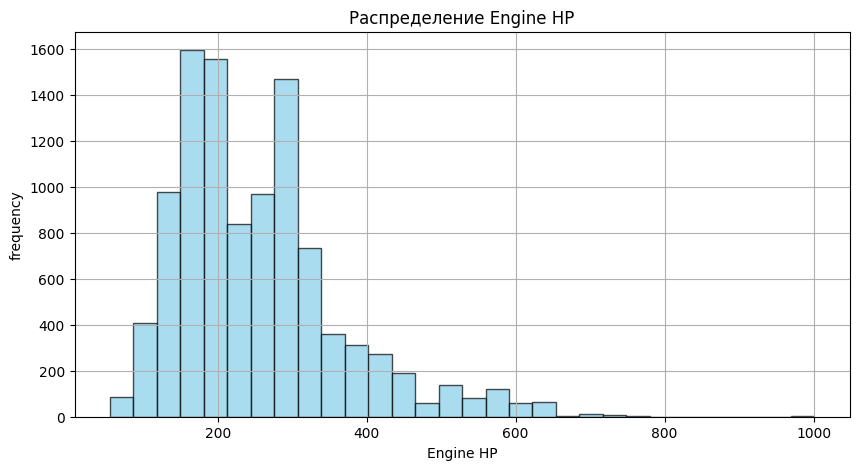

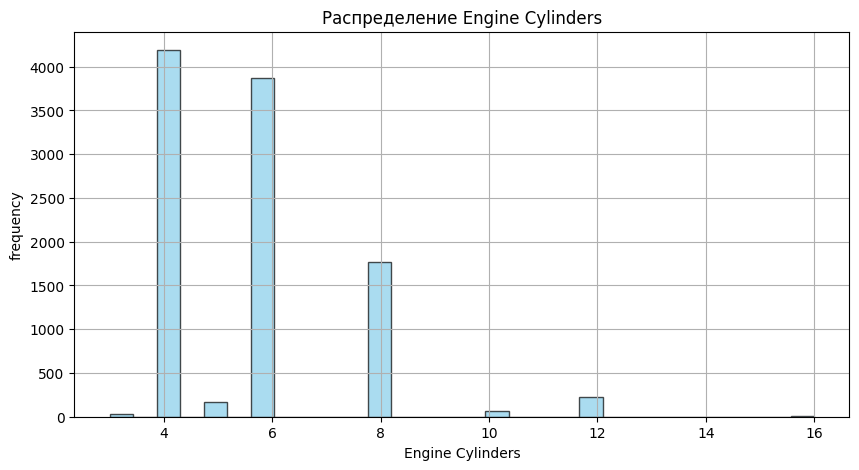

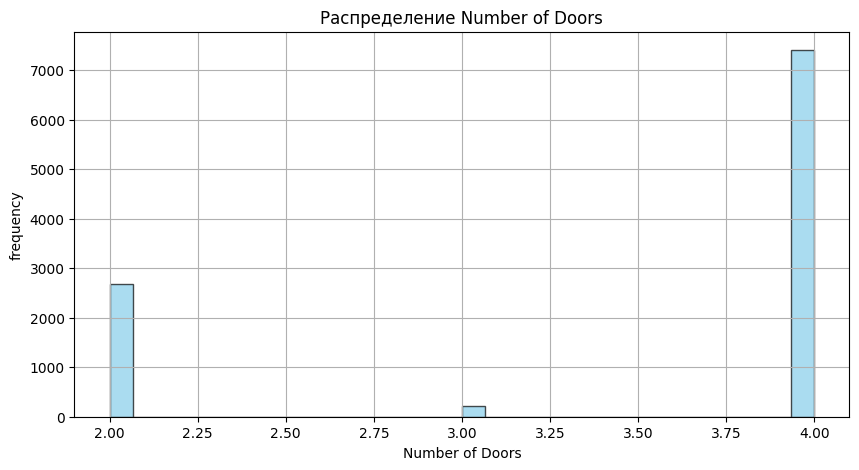

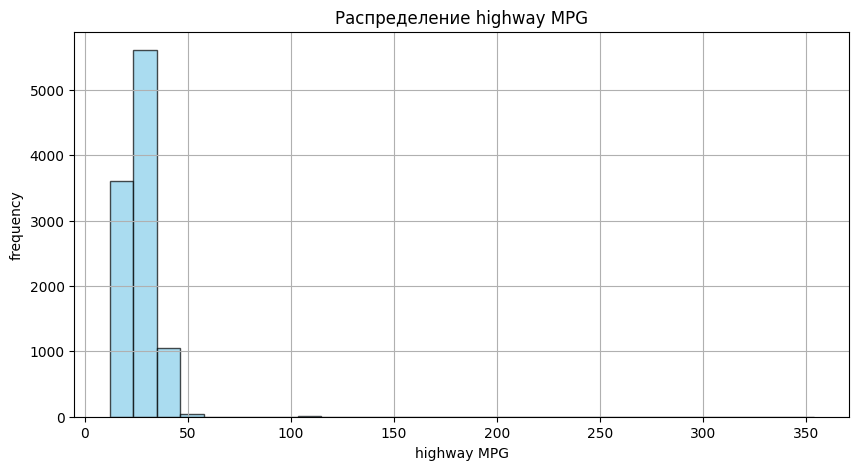

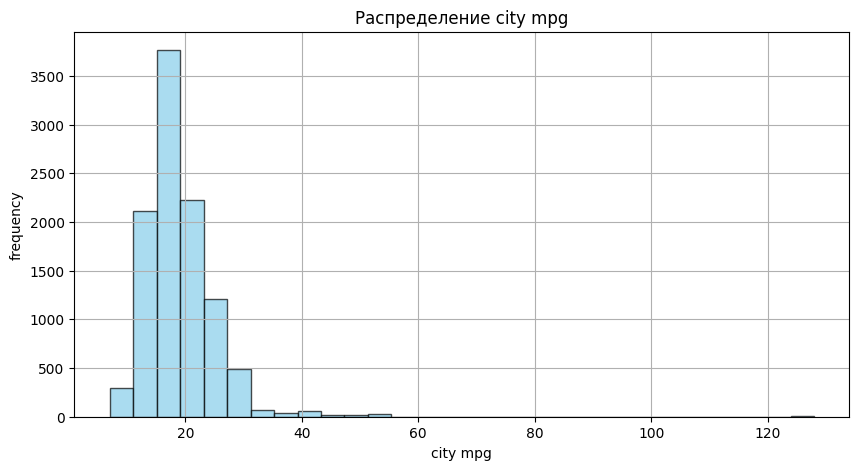

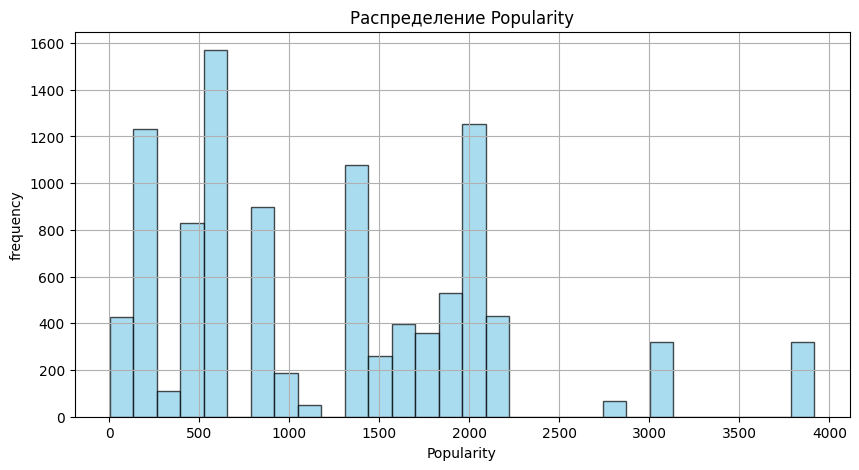

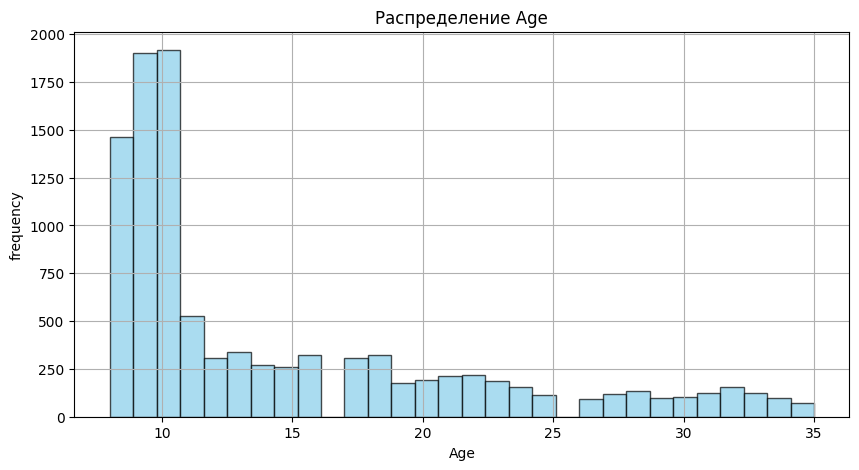

In [28]:
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    df[col].hist(bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f"Распределение {col}")
    plt.ylabel("frequency")
    plt.xlabel(col)

Text(0.5, 0, 'price')

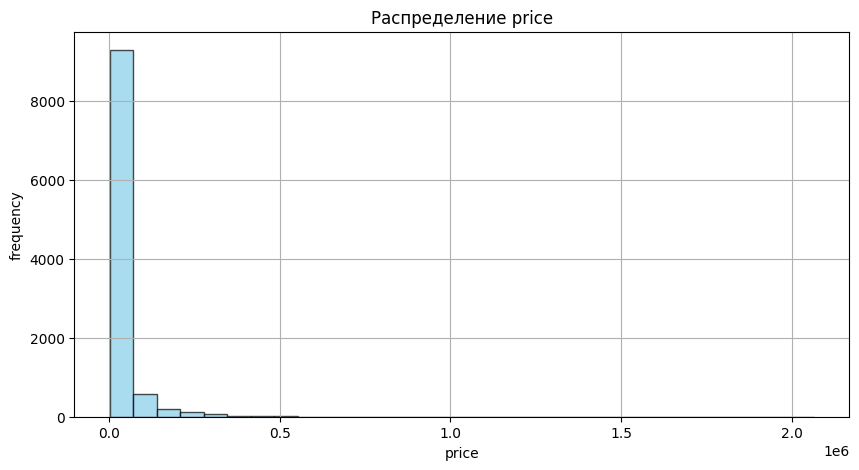

In [29]:
plt.figure(figsize=(10, 5))
df['price'].hist(bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title(f"Распределение {'price'}")
plt.ylabel("frequency")
plt.xlabel('price')

3) Диаграммы рассеяния

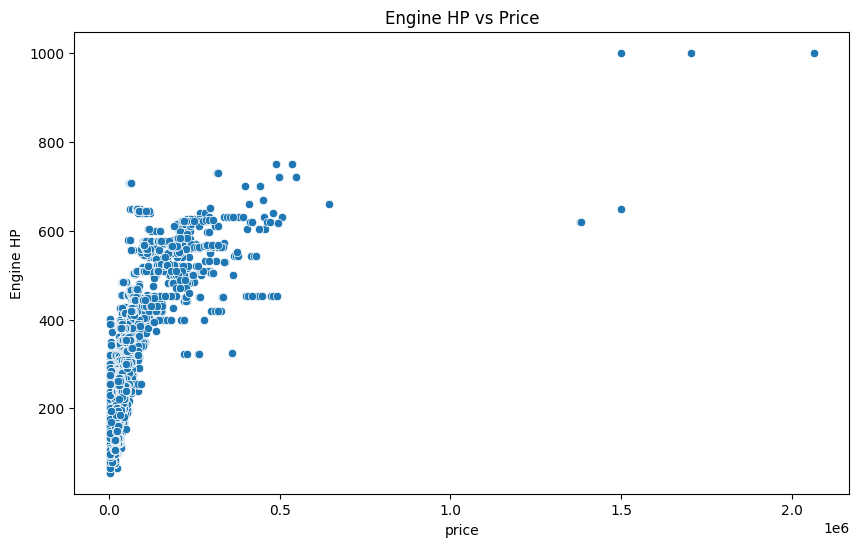

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["price"], y=df["Engine HP"])
plt.title("Engine HP vs Price");

Матрица диаграмм рассеяния

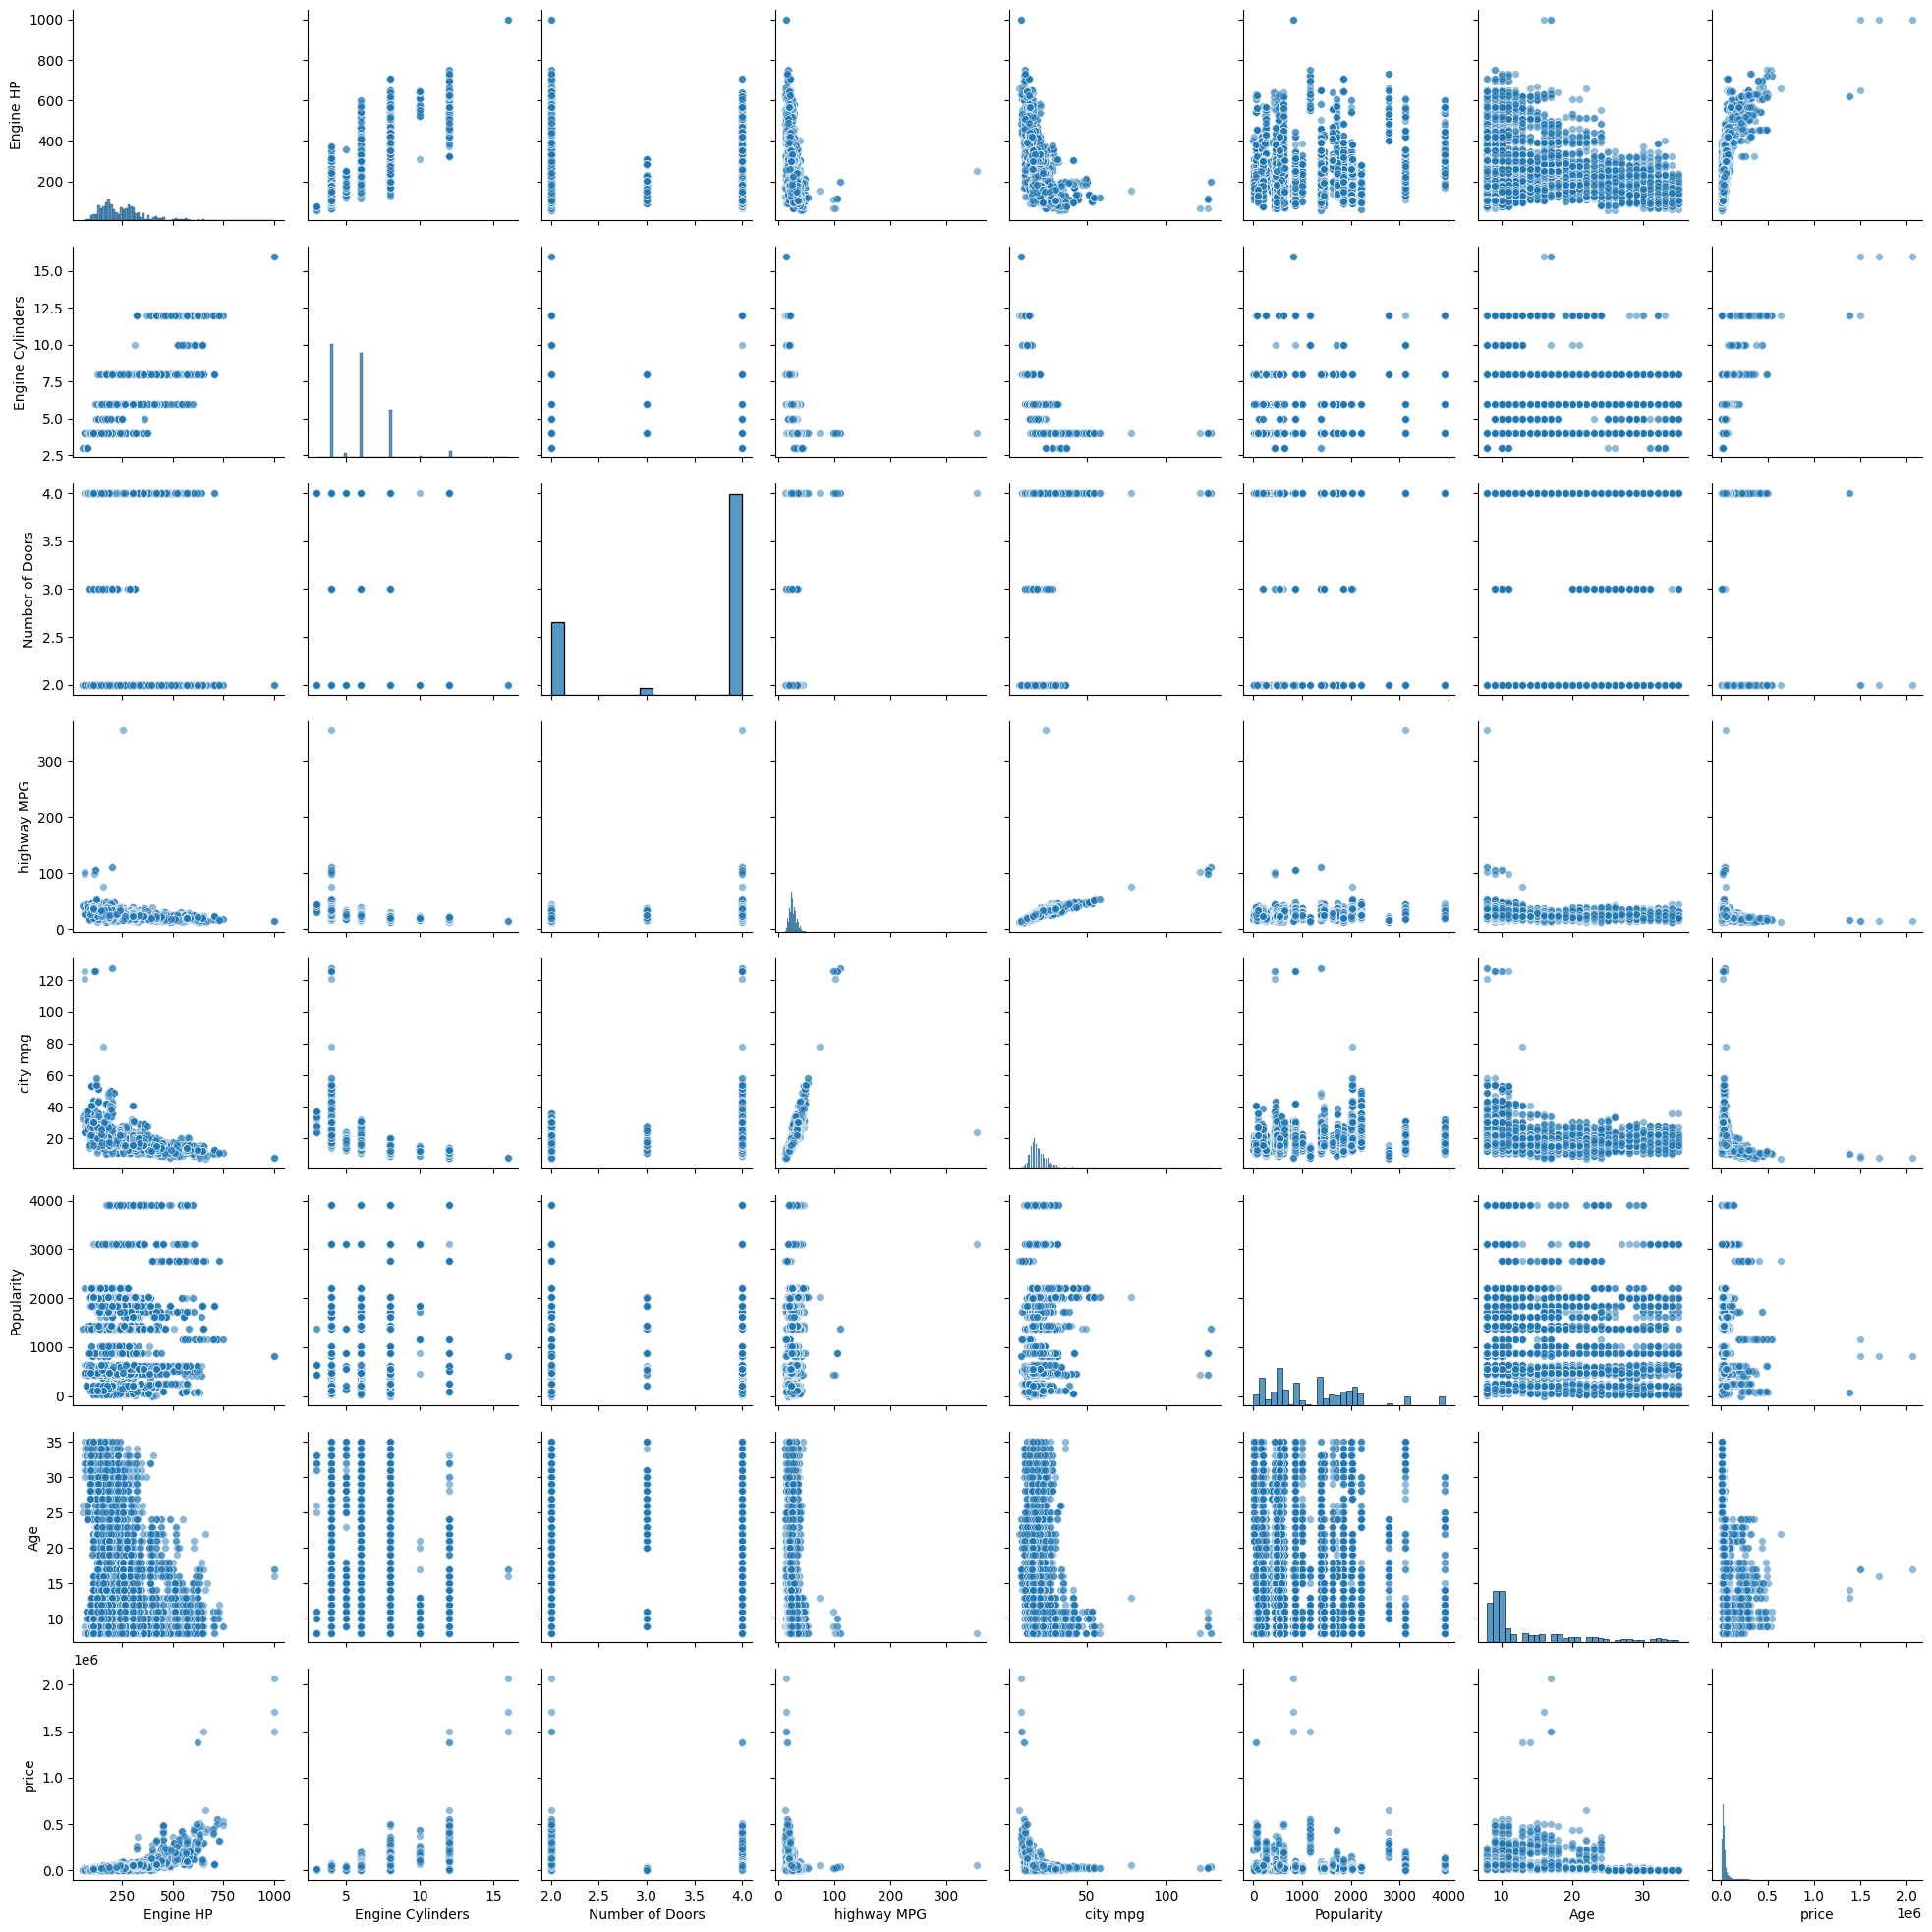

In [31]:
pairplot = sns.pairplot(
        df[['Engine HP', 'Engine Cylinders', 'Number of Doors', 
                   'highway MPG', 'city mpg', 'Popularity', 'Age', 'price']],
        diag_kind='hist', 
        corner=False, 
        plot_kws={'alpha': 0.5, 's': 30},
    )

4) Тепловая карта и матрица корреляций

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Age,price
Engine HP,1.000000,0.804837,-0.138185,-0.438928,-0.498420,0.085544,-0.329233,0.665805
Engine Cylinders,0.804837,1.000000,-0.141668,-0.587400,-0.605461,0.010994,0.010127,0.573051
Number of Doors,-0.138185,-0.141668,1.000000,0.105488,0.131037,-0.067360,-0.235139,-0.158821
highway MPG,-0.438928,-0.587400,0.105488,1.000000,0.833166,0.079714,-0.267389,-0.223595
city mpg,-0.498420,-0.605461,0.131037,0.833166,1.000000,0.065007,-0.225147,-0.252158
Popularity,0.085544,0.010994,-0.067360,0.079714,0.065007,1.000000,-0.172218,0.001378
Age,-0.329233,0.010127,-0.235139,-0.267389,-0.225147,-0.172218,1.000000,-0.203733
price,0.665805,0.573051,-0.158821,-0.223595,-0.252158,0.001378,-0.203733,1.000000


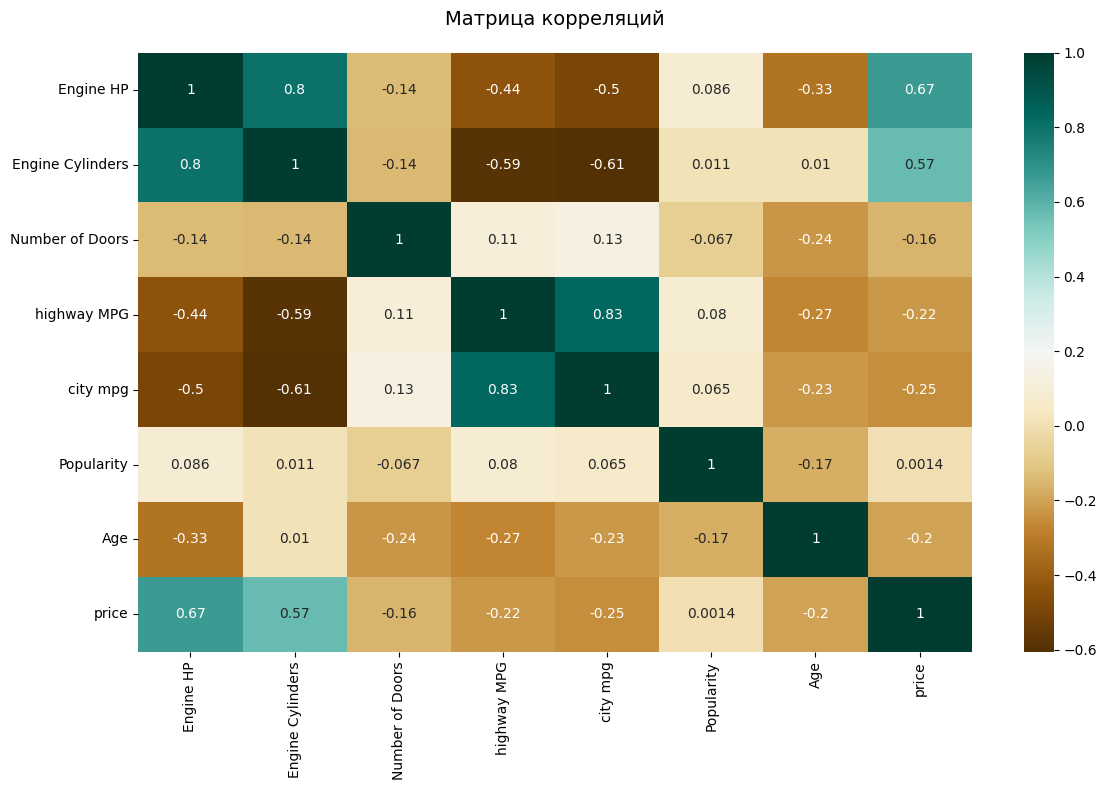

In [32]:
plt.figure(figsize=(12,8))
c = df[['Engine HP', 'Engine Cylinders', 'Number of Doors', 
                   'highway MPG', 'city mpg', 'Popularity', 'Age', 'price']].corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.title("Матрица корреляций", fontsize=14, pad=20)
plt.tight_layout()
c

## Обучение моделей

1) Перед обучением необходимо закодировать категориальные признаки

In [33]:
df_encoded = df.copy()
# Ordinal Encoding для Vehicle Size
size_map = {'Compact': 0, 'Midsize': 1, 'Large': 2}
df_encoded['Vehicle Size'] = df_encoded['Vehicle Size'].map(size_map)

In [37]:
onehot_columns = ['Vehicle Style', 'Engine Fuel Type', 
                  'Transmission Type', 'Driven_Wheels']

# One-Hot Encoding
df_encoded = pd.get_dummies(
    df_encoded,
    columns=onehot_columns,
    drop_first=True
)

In [39]:
binary_cols = [col for col in df_encoded.columns 
               if df_encoded[col].dtype == 'bool']

df_encoded[binary_cols] = df_encoded[binary_cols].astype('int8')

print(f"Преобразовано {len(binary_cols)} колонок из bool в int")

Преобразовано 31 колонок из bool в int


In [41]:
# Вычисляем частоту каждого бренда
make_counts = df_encoded['Make'].value_counts()
make_freq = df_encoded['Make'].value_counts(normalize=True)

# Применяем Frequency Encoding
df_encoded['Make_freq'] = df_encoded['Make'].map(make_freq)
df_encoded = df_encoded.drop(columns=['Make'])

In [42]:
df_encoded.head(5)

,Engine HP,Engine Cylinders,Number of Doors,Vehicle Size,highway MPG,city mpg,Popularity,price,Age,Vehicle Style_2dr SUV,...,Engine Fuel Type_premium unleaded (required),Engine Fuel Type_regular unleaded,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Make_freq
0,335.0,6,2,0,26,19,3916,46135,14,0,...,1,0,0,0,1,0,0,0,1,0.031017
1,300.0,6,2,0,28,19,3916,40650,14,0,...,1,0,0,0,1,0,0,0,1,0.031017
2,300.0,6,2,0,28,20,3916,36350,14,0,...,1,0,0,0,1,0,0,0,1,0.031017
3,230.0,6,2,0,28,18,3916,29450,14,0,...,1,0,0,0,1,0,0,0,1,0.031017
4,230.0,6,2,0,28,18,3916,34500,14,0,...,1,0,0,0,1,0,0,0,1,0.031017


In [43]:
df_encoded.dtypes

Engine HP                                                        float64
Engine Cylinders                                                   int64
Number of Doors                                                    int64
Vehicle Size                                                       int64
highway MPG                                                        int64
city mpg                                                           int64
Popularity                                                         int64
price                                                              int64
Age                                                                int64
Vehicle Style_2dr SUV                                               int8
Vehicle Style_4dr Hatchback                                         int8
Vehicle Style_4dr SUV                                               int8
Vehicle Style_Cargo Minivan                                         int8
Vehicle Style_Cargo Van                            

Ordinal Encoding — это метод кодирования категориальных переменных, где категории имеют естественный порядок или иерархию. Мы присваиваем числа от 0 до N-1, сохраняя логическую последовательность. Такой метод применим только к Vehicle Size, так как размер автомобиля имеет четкий порядок.

One-Hot Encoding создает бинарные признаки для каждой категории. Каждая новая колонка показывает принадлежит ли объект к данной категории. Параметр drop_first=True критически важен для линейных моделей, он удаляет первую категорию, чтобы избежать ситуации полной мультиколлинеарности, когда одна колонка может быть точно вычислена из других. Применяем к большинству категориальных признаков, так как важна каждая отдельная группа.

Frequency Encoding заменяет категории на их частоту встречаемости в датасете. Каждой категории присваивается значение от 0 до 1, показывающее, как часто она встречается. Использовали для категории Make, чтобы сохранить данные о марках, при этом не перегружая датасет (использование One-Hot Encoding для 48 уникальных значений) и не создавая ложного порядка (использование Label Encoding).

2) Логарифмирование целевой переменной

In [44]:
print(f"Исходное распределение price:")
print(f"  Медиана: ${df_encoded['price'].median():,.0f}")
print(f"  Среднее: ${df_encoded['price'].mean():,.0f}")
print(f"  Min:     ${df_encoded['price'].min():,.0f}")
print(f"  Max:     ${df_encoded['price'].max():,.0f}")
print(f"  Skewness: {df_encoded['price'].skew():.2f}")

# Применяем логарифмическое преобразование
df_encoded['log_price'] = np.log1p(df_encoded['price'])

print(f"\nПосле преобразования log(1 + price):")
print(f"  Медиана log_price: {df_encoded['log_price'].median():.2f}")
print(f"  Среднее log_price: {df_encoded['log_price'].mean():.2f}")
print(f"  Min log_price:     {df_encoded['log_price'].min():.2f}")
print(f"  Max log_price:     {df_encoded['log_price'].max():.2f}")
print(f"  Skewness log_price: {df_encoded['log_price'].skew():.2f}")

Исходное распределение price:
  Медиана: $30,775
  Среднее: $42,955
  Min:     $2,000
  Max:     $2,065,902
  Skewness: 11.26

После преобразования log(1 + price):
  Медиана log_price: 10.33
  Среднее log_price: 10.19
  Min log_price:     7.60
  Max log_price:     14.54
  Skewness log_price: -0.90


До преобразования была чрезвычайно правоскошенное распределение цен со значением скошенности (skewness) 11.26. Это очень высокий показатель, который указывает на серьезные проблемы с распределением данных:

Огромный разброс значений: минимальная цена 2,000, максимальная - 2,065,902

Среднее значительно больше медианы: 42,955 против 30,775

Длинный правый хвост: небольшое количество очень дорогих автомобилей (выбросов)

Такое распределение создает серьезные проблемы для линейных моделей регрессии, которые предполагают нормальное распределение ошибок. Модели будут пытаться минимизировать огромные ошибки на дорогих автомобилях в ущерб точности предсказания для основной массы автомобилей.

Логарифмическое преобразование выполнило свою главную задачу, оно улучшило распределение целевой переменной. Уменьшение скошенности с 11.26 до -0.90 является хорошим результатом, который позволит моделям регрессии работать эффективно и давать качественные предсказания. Левоскошенность -0.90 не является проблемой, это нормальное явление после логарифмирования сильно правоскошенных данных.

3) Стандартизация и разделение данных

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop(columns=['price', 'log_price'])
y = df_encoded['log_price']

# Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15
)

# Сохраняем оригинальные цены
y_train_orig = df_encoded.loc[y_train.index, 'price']
y_test_orig = df_encoded.loc[y_test.index, 'price']

# Стандартизация
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Линейная регрессия

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_log = lr_model.predict(X_test_scaled)
y_pred_dollars = np.expm1(y_pred_log)

# Вычисляем метрики в долларах
mae = mean_absolute_error(y_test_orig, y_pred_dollars)
mse = mean_squared_error(y_test_orig, y_pred_dollars)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_orig, y_pred_dollars)

print("Linear Regression - Метрики:")
print(f"MAE:  ${mae:,.0f}")
print(f"MSE:  ${mse:,.0f}")
print(f"RMSE: ${rmse:,.0f}")
print(f"R²:   {r2:.4f}")

Linear Regression - Метрики:
MAE:  $13,371
MSE:  $1,072,853,156
RMSE: $32,754
R²:   0.6645


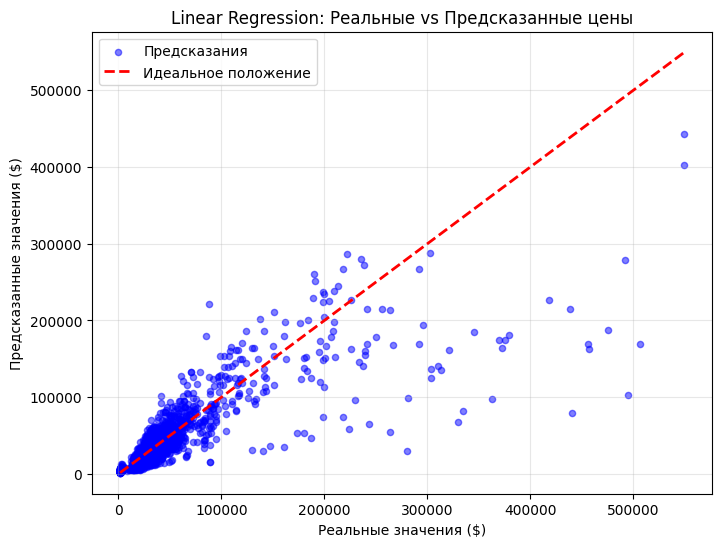

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_orig, y_pred_dollars, color='blue', alpha=0.5, s=20, label='Предсказания')

min_val = min(min(y_test_orig), min(y_pred_dollars))
max_val = max(max(y_test_orig), max(y_pred_dollars))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', 
         linewidth=2, label='Идеальное положение')

plt.xlabel('Реальные значения ($)')
plt.ylabel('Предсказанные значения ($)')
plt.title('Linear Regression: Реальные vs Предсказанные цены')
plt.legend()
plt.grid(True, alpha=0.3)

### LASSO

In [52]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4, 2, 100)  # от 0.0001 до 100 в логарифмической шкале

lasso = Lasso(max_iter=10000, random_state=15)  # увеличиваем max_iter для сходимости

lasso_cv = GridSearchCV(
    estimator=lasso,
    param_grid={'alpha': alphas},
    cv=5, 
    scoring='neg_mean_squared_error',  # минимизируем MSE
    n_jobs=-1,
    verbose=0
)

lasso_cv.fit(X_train_scaled, y_train)

best_lasso = lasso_cv.best_estimator_

y_pred_log_lasso = best_lasso.predict(X_test_scaled)
y_pred_dollars_lasso = np.expm1(y_pred_log_lasso)

# Вычисляем метрики в долларах
mae_lasso = mean_absolute_error(y_test_orig, y_pred_dollars_lasso)
mse_lasso = mean_squared_error(y_test_orig, y_pred_dollars_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test_orig, y_pred_dollars_lasso)

print("LASSO Regression - Метрики:")
print(f"Лучший alpha: {best_lasso.alpha:.6f}")
print(f"MAE:  ${mae_lasso:,.0f}")
print(f"MSE:  ${mse_lasso:,.0f}")
print(f"RMSE: ${rmse_lasso:,.0f}")
print(f"R²:   {r2_lasso:.4f}")

LASSO Regression - Метрики:
Лучший alpha: 0.005722
MAE:  $13,568
MSE:  $1,113,505,251
RMSE: $33,369
R²:   0.6518


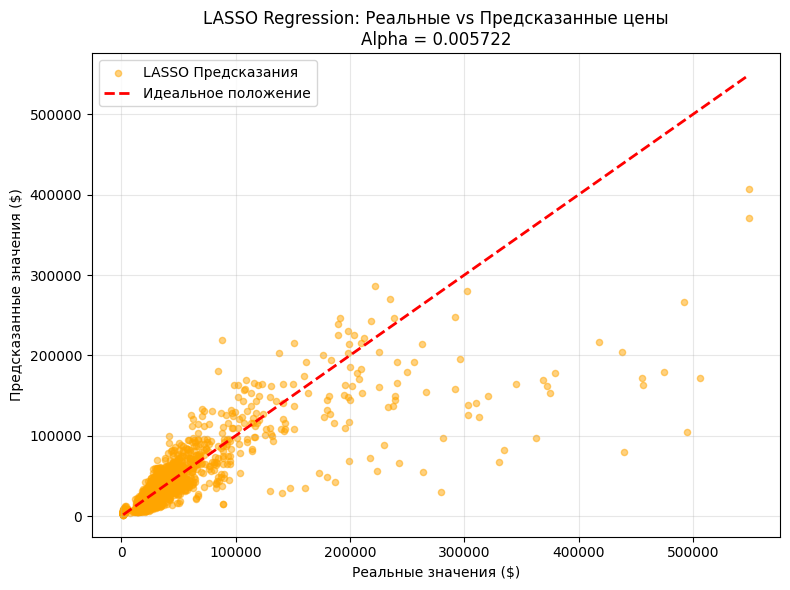

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_orig, y_pred_dollars_lasso, color='orange', alpha=0.5, s=20, label='LASSO Предсказания')

min_val = min(min(y_test_orig), min(y_pred_dollars_lasso))
max_val = max(max(y_test_orig), max(y_pred_dollars_lasso))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', 
         linewidth=2, label='Идеальное положение')

plt.xlabel('Реальные значения ($)')
plt.ylabel('Предсказанные значения ($)')
plt.title(f'LASSO Regression: Реальные vs Предсказанные цены\nAlpha = {best_lasso.alpha:.6f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

### Ридж-регрессия

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alphas_ridge = np.logspace(-2, 4, 150)  # от 0.01 до 10000

ridge = Ridge(max_iter=10000, random_state=15)

ridge_cv = GridSearchCV(
    estimator=ridge,
    param_grid={'alpha': alphas_ridge},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

ridge_cv.fit(X_train_scaled, y_train)

best_ridge = ridge_cv.best_estimator_

y_pred_log_ridge = best_ridge.predict(X_test_scaled)
y_pred_dollars_ridge = np.expm1(y_pred_log_ridge)

mae_ridge = mean_absolute_error(y_test_orig, y_pred_dollars_ridge)
mse_ridge = mean_squared_error(y_test_orig, y_pred_dollars_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test_orig, y_pred_dollars_ridge)

print("RIDGE Regression - Метрики:")
print(f"Лучший alpha: {best_ridge.alpha:.6f}")
print(f"MAE:  ${mae_ridge:,.0f}")
print(f"MSE:  ${mse_ridge:,.0f}")
print(f"RMSE: ${rmse_ridge:,.0f}")
print(f"R²:   {r2_ridge:.4f}")

RIDGE Regression - Метрики:
Лучший alpha: 323.643668
MAE:  $13,209
MSE:  $1,105,779,249
RMSE: $33,253
R²:   0.6542


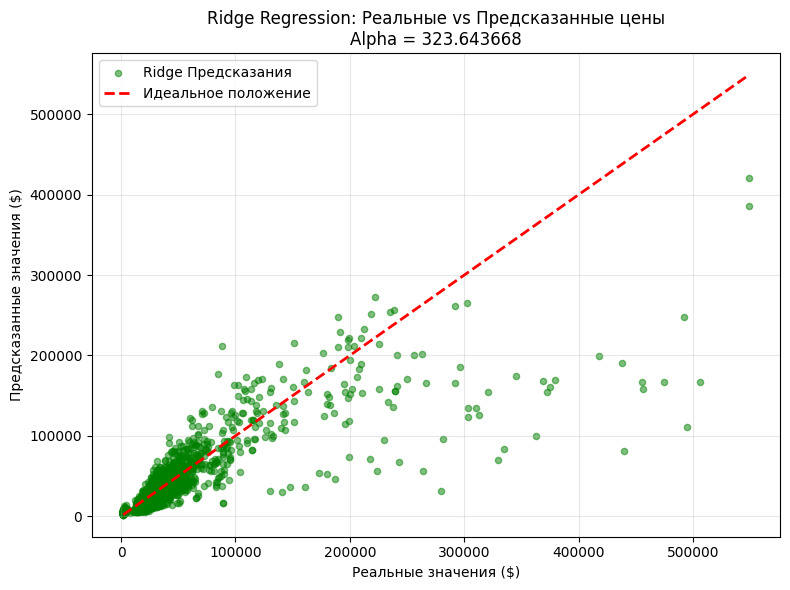

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_orig, y_pred_dollars_ridge, color='green', alpha=0.5, s=20, label='Ridge Предсказания')

min_val = min(min(y_test_orig), min(y_pred_dollars_ridge))
max_val = max(max(y_test_orig), max(y_pred_dollars_ridge))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', 
         linewidth=2, label='Идеальное положение')

plt.xlabel('Реальные значения ($)')
plt.ylabel('Предсказанные значения ($)')
plt.title(f'Ridge Regression: Реальные vs Предсказанные цены\nAlpha = {best_ridge.alpha:.6f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()